 ## Decision Tree 

In [10]:
import pandas as pd
df  = pd.read_csv("iris-data.csv")
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
#output column and there are three classes 
pd.unique(df["class"])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [12]:
#perform label Encoding on the output column and rest of the column are in numerical values
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_encoded = df
df_encoded['class'] = label_encoder.fit_transform(df['class'])
df_encoded['class'].unique()

array([0, 1, 2])

In [13]:
df_encoded = pd.DataFrame(df_encoded)
df_encoded.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

In [14]:
x = df_encoded.drop(columns=['class'])
y = df_encoded['class'] 

In [15]:
#Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((112, 4), (38, 4), (112,), (38,))

In [16]:
# Impoting the decision tree Model 
from sklearn.tree import DecisionTreeClassifier
clf  = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [17]:
clf.score(x_test,y_test)

0.9473684210526315

In [18]:
# create  y predict
y_pred = clf.predict(x_test)

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score
Acc = accuracy_score(y_test, y_pred)
confusion_metric = confusion_matrix(y_test, y_pred)
print(Acc)
confusion_metric

0.9473684210526315


array([[16,  0,  0],
       [ 0, 10,  1],
       [ 0,  1, 10]])

In [20]:
#numerical array representing the importance of each feature. 
clf.feature_importances_

array([0.        , 0.0178928 , 0.06271769, 0.9193895 ])

[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.46153846153846156, 0.8333333333333333, 'True  '),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.5384615384615384, 0.8333333333333333, '  False'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\nentropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\nentropy = 0.146\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'entropy = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\nentropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(

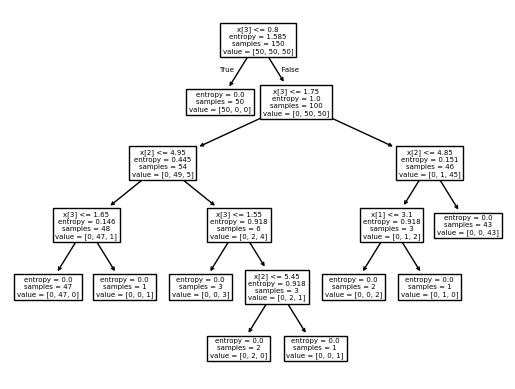

In [22]:
from sklearn import tree
clf_1 = tree.DecisionTreeClassifier(criterion='entropy')
clf_1.fit(x,y)
tree.plot_tree(clf_1)

[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.46153846153846156, 0.8333333333333333, 'True  '),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.5384615384615384, 0.8333333333333333, '  False'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, '

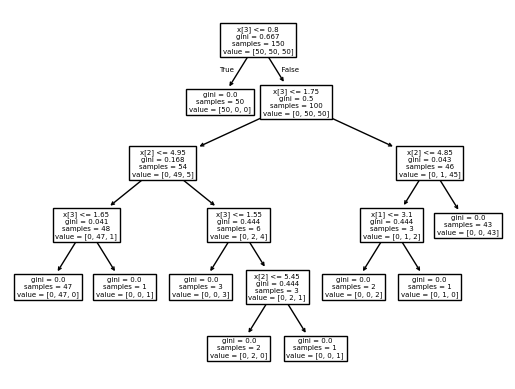

In [23]:
from sklearn import tree
clf_1 = tree.DecisionTreeClassifier(criterion='gini')
clf_1.fit(x,y)
tree.plot_tree(clf_1)

In [32]:
# take a input of fourth column and predict the last column and then check whether is correct or not
input = [[4,6,2,1]]
input = pd.DataFrame(input)
single_pred_encoded = clf.predict(input)[0]
single_pred_class = label_encoder.inverse_transform([single_pred_encoded])[0]
single_pred_class

C:\Users\gaura\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


'Iris-versicolor'

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf_2 = DecisionTreeClassifier(random_state=0)
cv_score = cross_val_score(clf_2, x, y, cv=5)
mean_score = cv_score.mean()  
std_score = cv_score.std()    
print("Mean Accuracy:", mean_score)
print("Standard Deviation:", std_score)  

Mean Accuracy: 0.9600000000000002
Standard Deviation: 0.03265986323710903
